# Linear models and Regression

This worksheet will guide you to using regressionmodels. 

When you have classes of data (example cats and dogs...) you can classify these using classifiers. But what if you are trying to predict a value on a scale... For example you might want to predict how much a house costs based on its size. You cannot predict between a class...

This tutorial will guide you through 
- downloading an open dataset
- setting up various regression models
- tuning hyperparameters to get the best outcome

You will need to make sure you have installed the libraries of 
- kagglehub
- sklearn

In [ ]:
!pip install kagglehub
!pip install -U scikit-learn
!pip install statsmodels

In [1]:
import numpy as np #library for using large arrays in python
import pandas as pd #library for playing with datasets
import kagglehub
import matplotlib.pyplot as plt
############# regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf

## importing a dataset
Firstly take a look at Kaggle https://www.kaggle.com/ which is a great platform for people posting datasets. Have a look round, for now we wll be using a specific dataset but later on you should download datasets that interests you.


In [2]:
#to import the data we will use the open datasets library #we place the link copied from Kaggle into the parameter of the download function
path = kagglehub.dataset_download("shree1992/housedata")

# Download latest version
print("Path to dataset files:", path)

Path to dataset files: C:\Users\dexte\.cache\kagglehub\datasets\shree1992\housedata\versions\2


## playing with our data

Great now we have downloaded a dataset... but can we just plug this into a model? No! We have to look at our data, how it is formatted and how this looks. The data is downloaded in a folder in csv format. Try to think back to how we opened up a dataset from yesterdays lab.

Remember to open the data.csv (or whatever file within your dataset contains the information) and not just the path.

In [3]:
# TASKS

# open the dataset from the csv, you already have the path
df = pd.read_csv(path+"/data.csv")
# visualise this dataset 
print(df.describe())
print(df.head())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

## Modelling the data

Before we get into anything fancy, lets train some regression models. Regression models take data in a linear format. By this I mean e need all the data to be represetned by a single vector. Lets say we only care about the bedrooms and bathrooms, and nothing else matters. We would then have [bedroom_no, bathroom_no] and a label [price of house]. The input data is the number of bedrooms andnumber of bathrooms... and our label data is the cost of that house. 

To extract this data is quite simple, we just grab the columns from the dataset that we want, convert to numpy and put them together (using the concatenate function).

We have shown you how to do it for bedrooms and bathrooms. Play around and try add some other useful metrics into the input data. By the end we want to have a matrix n x m, where n is the number of samples, and m is the number of features we want to take input from. So for the above example m would be 2, bedrooms and bathrooms. 

In [4]:
# we can grab a column by using the column title 
bedrooms = df['bedrooms']
bathrooms = df['bathrooms']
#we can then convert the pandas object to numpy arrays so we can work with them for machine learning
bedrooms = bedrooms.to_numpy()
bathrooms = bathrooms.to_numpy()
#when we add them together we dont just want to add them together and go from a dataset of n to 2n... so we create a new axis.
print("Bathroom shape:",bathrooms.shape)
converted_bathroom=bathrooms.reshape((-1,1)) #-1 means ignore axis
converted_bedroom=bedrooms.reshape((-1,1)) #-1 means ignore axis
print("Bathrooms post processing:",converted_bathroom.shape)
#once they are in this shape we can add them together
X_data=np.concatenate([converted_bathroom,converted_bedroom],axis=1) #axis is telling us where we want to combine them

#or we could do all the above code in one line:
X_data = np.concatenate([df['bedrooms'].to_numpy().reshape((-1,1)),df['bathrooms'].to_numpy().reshape((-1,1))],axis=1)



#then to gather the labels we can use
y_data=df['price']

print("Expected data shape:",X_data.shape)
print("Expected label shape:",y_data.shape)

assert len(y_data)==len(X_data), "incorrect shapes, x and y must be the same"

Bathroom shape: (4600,)
Bathrooms post processing: (4600, 1)
Expected data shape: (4600, 2)
Expected label shape: (4600,)


In [83]:
# TASK

#now add in a new column, or a few new columns from the dataset
X_data = np.concatenate([df['bedrooms'].to_numpy().reshape((-1,1)),df['bathrooms'].to_numpy().reshape((-1,1)),df['sqft_above'].to_numpy().reshape((-1,1))],axis=1)
print("Expected data shape:",X_data.shape)

#this will make sure your code works, assuming you use the same variable names for your labels
assert len(y_data)==len(X_data), "incorrect shapes, x and y must be the same"

Expected data shape: (4600, 3)


How do we know which data to use? Well to begin with you could go about plotting values and evaluating visually if there are links.


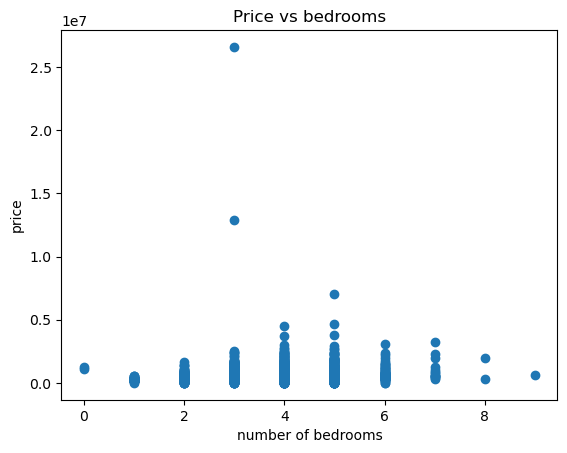

In [84]:
plt.scatter(df['bedrooms'],df['price'])
plt.xlabel("number of bedrooms")
plt.ylabel("price")
plt.title("Price vs bedrooms")
plt.show()

it looks like number of bedrooms alone does not directly impact the price of a house. Have a look at some other variables and see if there are any that show relationships.

### Converting our data to a train and test set

It is important with models to train it on as much data as we can, but how does it perform on unseen data? We must reserve part of the dataset for testing. This tells us how well our model works outside what it has seen. If it does not perform well it suggests overfitting... or even a lack of relationship between your data and labels. 

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

#another hyperparameter is the test_sixe, by default it is 20%, but does varying this size impact accuracy?

#an idea for challenges once you have finished is to investigate this
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

#another hyperparameter is the random state. This does not impact the way the model performs significantly
# but the way the data begins can change the accuracy. For fair experiments you should change the random state to random numbers
# and then average the model performance over a number of trials

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=np.random.randint(0,100))


## Training a model
This section is about importing various regression models and training. 

### Linear regression
Linear regression is conseptually the most simple model. Lets take a look at implementing this:

Coefficients: [ -3906.23172794 107023.3170123     169.19974278]
Intercept: 27050.274822522188
Mean squared error (MSE): 105129748677.7484


R^2 score: 0.3508287577270537


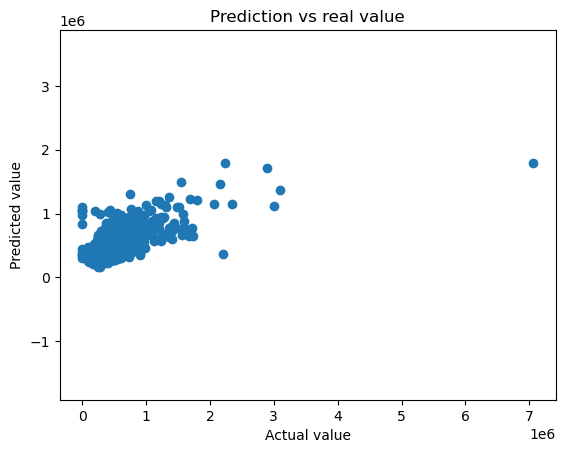

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#evaluate the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error (MSE):", mean_squared_error(y_test, y_pred)) #this should be low
print("R^2 score:", r2_score(y_test, y_pred))

plt.axis('equal')
plt.grid(1)
plt.title("Prediction vs real value")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

So looking at the graph and our MSE output, it seems the model has not performed too well. A good scatter of prediction vs real should be a diagonal line of points. Our data shows the predicted values are much lower than the real ones. It seems to predict low cost houses fairly well but not higher cost ones.

Lets take a look at some other models

### Ridge

Coefficients: [-6.09243487e+04  5.58813656e+04  1.60999044e+02 -7.42833325e-01
  2.90414394e+04  3.77863517e+05  4.16584578e+04  3.95598860e+04
  1.06949136e+02  5.40500346e+01 -2.33814668e+03  8.14573979e+00]
Intercept: 4504756.522067059
Mean squared error (MSE): 64124492877.73542
R^2 score: 0.5218321826710517


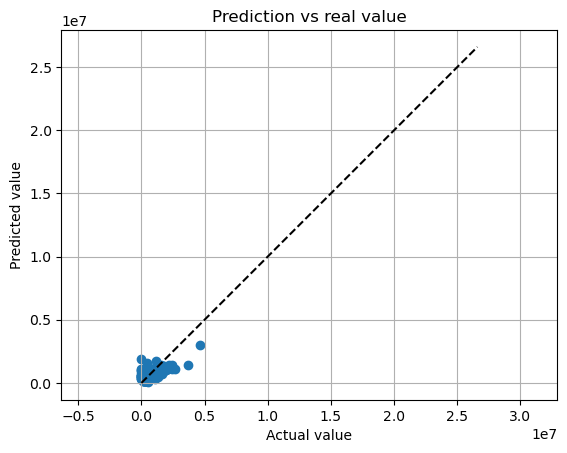

In [12]:
ridge = Ridge(alpha=1.0)  # Regularization strength
ridge.fit(X_train, y_train)

#make predictions
y_pred = ridge.predict(X_test)

#evaluate the model
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print("Mean squared error (MSE):", mean_squared_error(y_test, y_pred)) #this should be low
print("R^2 score:", r2_score(y_test, y_pred))

plt.axis('equal')
plt.plot([df['price'].min(), df['price'].max()],
         [df['price'].min(), df['price'].max()], 'k--')
plt.grid(1)
plt.title("Prediction vs real value")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

It is not that much better than the linear. It seems our data might not be enough to capture a decent relationship. Try going back and adding more values into the X data. Does this improve the data?

Coefficients: [-5.81345251e+04  4.69464777e+04  1.81678441e+02 -7.93471867e-01
  5.94453529e+04  4.06528266e+05  4.41620299e+04  2.16194935e+04
  1.02192946e+02  7.94840625e+01 -2.86868896e+03  1.08149810e+01]
Intercept: 5524824.568433027
Mean squared error (MSE): 812496347698.6133
R^2 score: 0.028435934555659625


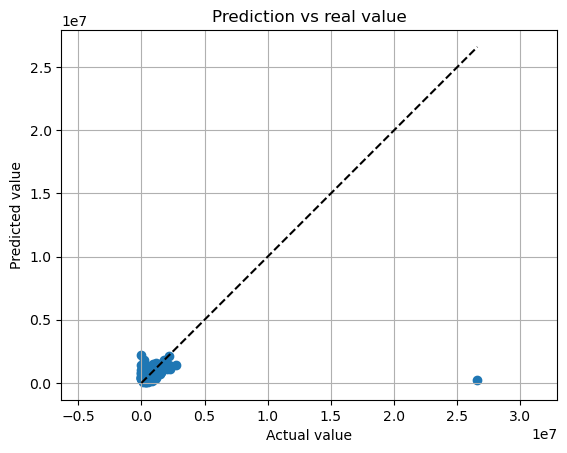

In [13]:
# train a model with more, lets include all values
X = df.drop('price', axis=1).select_dtypes(include=['number']).to_numpy()  # or .values
y = df['price'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(0,100))

ridge = Ridge(alpha=1.0)  # Regularization strength
ridge.fit(X_train, y_train)

#make predictions
y_pred = ridge.predict(X_test)

#evaluate the model
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print("Mean squared error (MSE):", mean_squared_error(y_test, y_pred)) #this should be low
print("R^2 score:", r2_score(y_test, y_pred))

plt.axis('equal')
plt.title("Prediction vs real value")
plt.plot([df['price'].min(), df['price'].max()],
         [df['price'].min(), df['price'].max()], 'k--')
plt.grid(1)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

Has this improved it? If not perhaps there is not enough of a linear relationship between the data. Lets look at structures that are better with noisy data

### Random forest regression

Mean squared error (MSE): 93429271511.12537
R^2 score: 0.30331034479619234


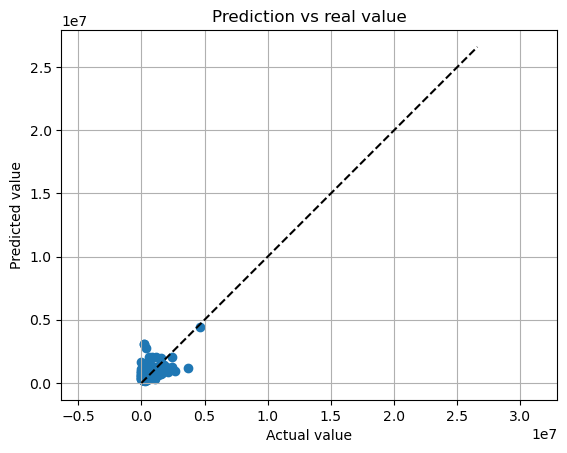

In [11]:

model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#evaluate the model
print("Mean squared error (MSE):", mean_squared_error(y_test, y_pred)) #this should be low
print("R^2 score:", r2_score(y_test, y_pred))

plt.axis('equal')
plt.grid(1)
plt.plot([df['price'].min(), df['price'].max()],
         [df['price'].min(), df['price'].max()], 'k--')
plt.title("Prediction vs real value")
plt.scatter(y_test,y_pred)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

### GLM

C:\Users\dexte\AppData\Local\Temp\ipykernel_37616\3788173377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['glm_pred'] = glm_model.predict(df)


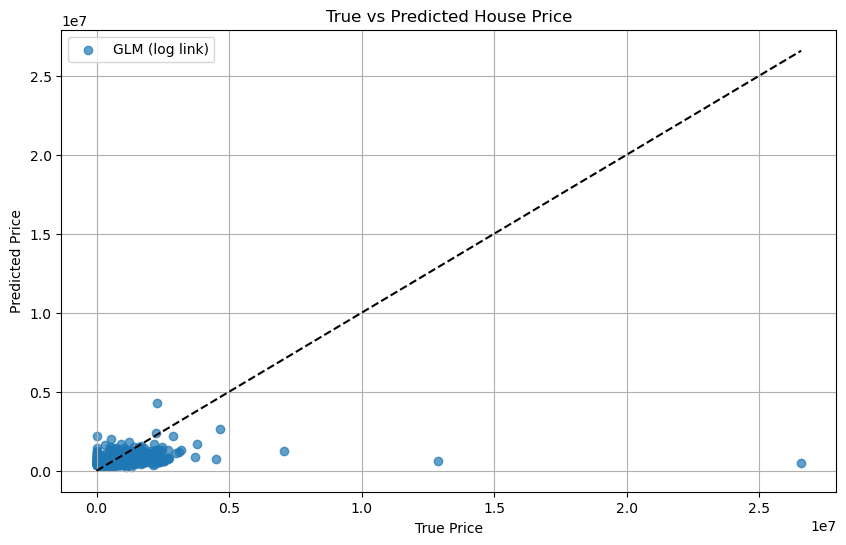

In [9]:
temp=df[['price','bathrooms','bedrooms']]

glm_model = smf.glm(formula='price ~ bathrooms + bedrooms', data=temp,
                    family=sm.families.Gaussian(link=sm.families.links.log())).fit()

temp['glm_pred'] = glm_model.predict(df)
plt.figure(figsize=(10, 6))
plt.scatter(temp['price'], temp['glm_pred'], label='GLM (log link)', alpha=0.7)
plt.plot([temp['price'].min(), temp['price'].max()],
         [temp['price'].min(), temp['price'].max()], 'k--')
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("True vs Predicted House Price")
plt.legend()
plt.grid(True)
plt.show()

## Conclusions so far

So far we have imported a dataset and played around with a few different hyperparameters. Go further to see how each hyperparemeter affects the accuracy. Try display this as a scientific experiment. 

Once you have optimised, play around with other datasets on kaggle. As long as the label is a continuous value rather than a classification task, the methods you learned here today are applicable. 